<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Datasets/AI4I-PMDI.csv')

print(df.head())

Mounted at /content/drive
   UDI              Date  System Control Product ID Type  Air temperature (K)  \
0    1  15/04/2014 11:56       0       C     M14860    M                  NaN   
1    2  12/04/2014 16:09       0       A     L47181    L                298.2   
2    3  13/04/2014 01:13       0       A     L47182    L                298.1   
3    4  24/07/2014 20:35       0       B     L47183    L                  NaN   
4    5  22/07/2014 01:31       0       C     L47184    L                  NaN   

   Process temperature (K)  Rotational speed (rpm)  Torque (Nm)  \
0                      NaN                     NaN         42.8   
1                    308.7                  1408.0          NaN   
2                    308.5                  1498.0          NaN   
3                      NaN                  1433.0         39.5   
4                      NaN                     NaN         40.0   

   Tool wear (min)  Diagnostic  
0              0.0  No failure  
1              NaN

In [3]:
unique_diagnostics = df['Diagnostic'].unique()
num_unique_diagnostics = len(unique_diagnostics)

print(f"Number of unique diagnostics: {num_unique_diagnostics}")
print(f"Unique diagnostic names: {unique_diagnostics}")

Number of unique diagnostics: 6
Unique diagnostic names: ['No failure' 'Power Failure' 'Overstrain Failure' 'Tool Wear Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [4]:
from IPython.display import display, HTML
print(df.isnull().sum())
display(HTML(df.head().to_html()))

UDI                           0
Date                          0
System                        0
Control                       0
Product ID                    0
Type                          0
Air temperature (K)        6563
Process temperature (K)    6563
Rotational speed (rpm)     3321
Torque (Nm)                3437
Tool wear (min)            6679
Diagnostic                    0
dtype: int64


,UDI,Date,System,Control,Product ID,Type,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic
0,1,15/04/2014 11:56,0,C,M14860,M,NaN,NaN,NaN,42.8,0.0,No failure
1,2,12/04/2014 16:09,0,A,L47181,L,298.2,308.7,1408.0,NaN,NaN,No failure
2,3,13/04/2014 01:13,0,A,L47182,L,298.1,308.5,1498.0,NaN,NaN,No failure
3,4,24/07/2014 20:35,0,B,L47183,L,NaN,NaN,1433.0,39.5,NaN,No failure
4,5,22/07/2014 01:31,0,C,L47184,L,NaN,NaN,NaN,40.0,9.0,No failure


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

label_encoder.fit(df['Diagnostic'])

# 'No failure' is always 0
diagnostic_classes = list(label_encoder.classes_)
diagnostic_classes.remove('No failure')
diagnostic_classes.insert(0, 'No failure')

# Apply the adjusted mapping
label_encoder.classes_ = np.array(diagnostic_classes, dtype=object)
df['Diagnostic_encoded'] = label_encoder.transform(df['Diagnostic'])

# Create a mapping dictionary for reference
diagnostic_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Diagnostic Mapping:")
for diagnostic, encoded_value in diagnostic_mapping.items():
    print(f"{diagnostic}: {encoded_value}")

# Display the updated DataFrame with the encoded column
print("\nUpdated DataFrame with encoded 'Diagnostic' column:")
display(HTML(df.head().to_html()))

Diagnostic Mapping:
No failure: 0
Heat Dissipation Failure: 1
Overstrain Failure: 2
Power Failure: 3
Random Failures: 4
Tool Wear Failure: 5

Updated DataFrame with encoded 'Diagnostic' column:


,UDI,Date,System,Control,Product ID,Type,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic,Diagnostic_encoded
0,1,15/04/2014 11:56,0,C,M14860,M,NaN,NaN,NaN,42.8,0.0,No failure,0
1,2,12/04/2014 16:09,0,A,L47181,L,298.2,308.7,1408.0,NaN,NaN,No failure,0
2,3,13/04/2014 01:13,0,A,L47182,L,298.1,308.5,1498.0,NaN,NaN,No failure,0
3,4,24/07/2014 20:35,0,B,L47183,L,NaN,NaN,1433.0,39.5,NaN,No failure,0
4,5,22/07/2014 01:31,0,C,L47184,L,NaN,NaN,NaN,40.0,9.0,No failure,0


In [6]:


# Drop the specified columns from the original DataFrame
df = df.drop(['UDI', 'Date', 'System', 'Control', 'Product ID', 'Type', 'Diagnostic'], axis=1)

# Display the updated DataFrame
print("\nDataFrame after dropping columns:")
display(HTML(df.head().to_html()))


DataFrame after dropping columns:


,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic_encoded
0,NaN,NaN,NaN,42.8,0.0,0
1,298.2,308.7,1408.0,NaN,NaN,0
2,298.1,308.5,1498.0,NaN,NaN,0
3,NaN,NaN,1433.0,39.5,NaN,0
4,NaN,NaN,NaN,40.0,9.0,0


In [8]:
from sklearn.experimental import enable_iterative_imputer #
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
numerical_cols = df.select_dtypes(include=['number']).columns
# Create an IterativeImputer object with Bayesian Ridge
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42,tol =0.01)

# Apply imputation
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Apply constraints to keep values within reasonable limits
df['Air temperature (K)'] = np.clip(df['Air temperature (K)'], 250, 400)
df['Process temperature (K)'] = np.clip(df['Process temperature (K)'], 250, 400)
df['Rotational speed (rpm)'] = np.clip(df['Rotational speed (rpm)'], 900, 3500)
df['Torque (Nm)'] = np.clip(df['Torque (Nm)'], 0, 100)
df['Tool wear (min)'] = np.clip(df['Tool wear (min)'], 0, 300)

# Display the updated DataFrame
print("\nUpdated DataFrame after imputing and clipping:")
display(HTML(df.head().to_html()))


Updated DataFrame after imputing and clipping:


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic_encoded
0,250.0,250.0,900.0,42.800000,0.000000,0.0
1,298.2,308.7,1408.0,49.352130,101.735729,0.0
2,298.1,308.5,1498.0,44.847462,104.383550,0.0
3,250.0,250.0,1433.0,39.500000,77.538358,0.0
4,250.0,250.0,900.0,40.000000,9.000000,0.0


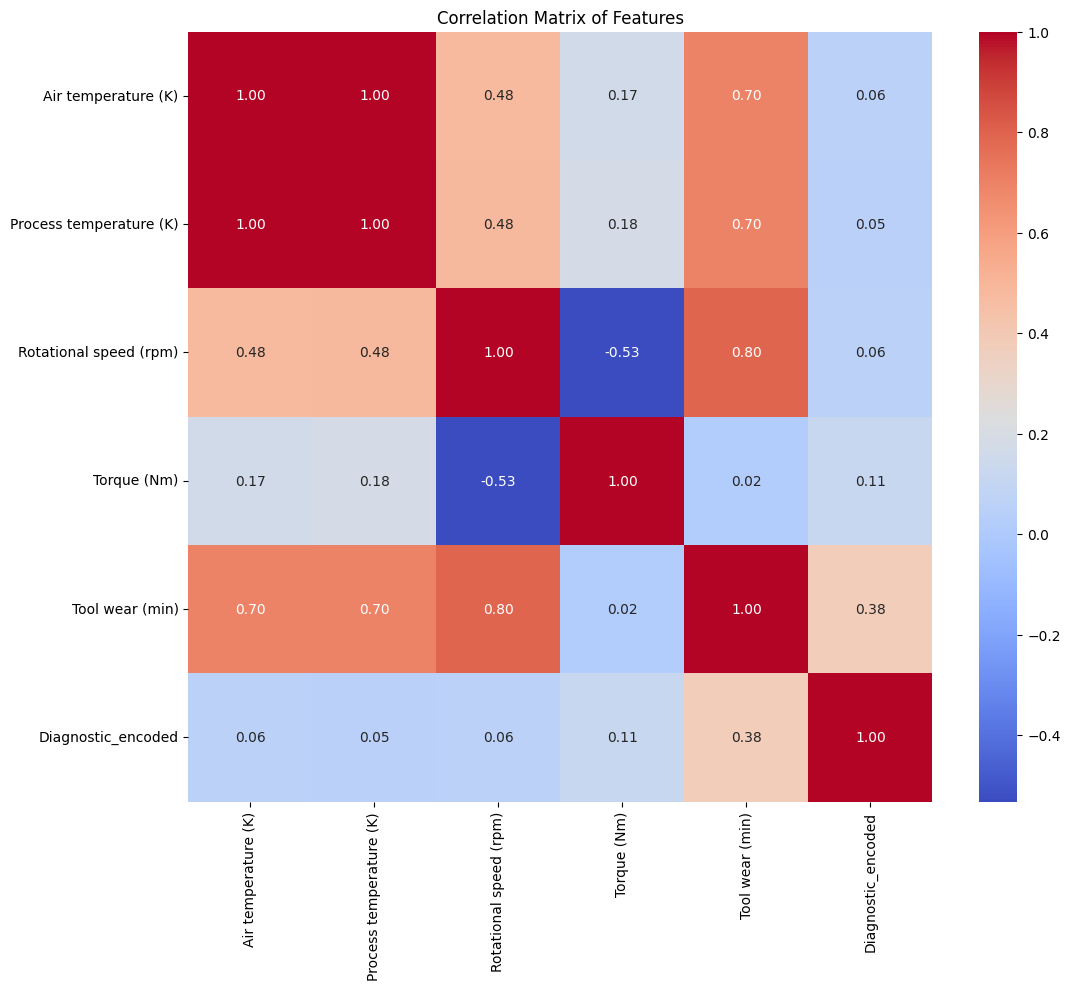

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

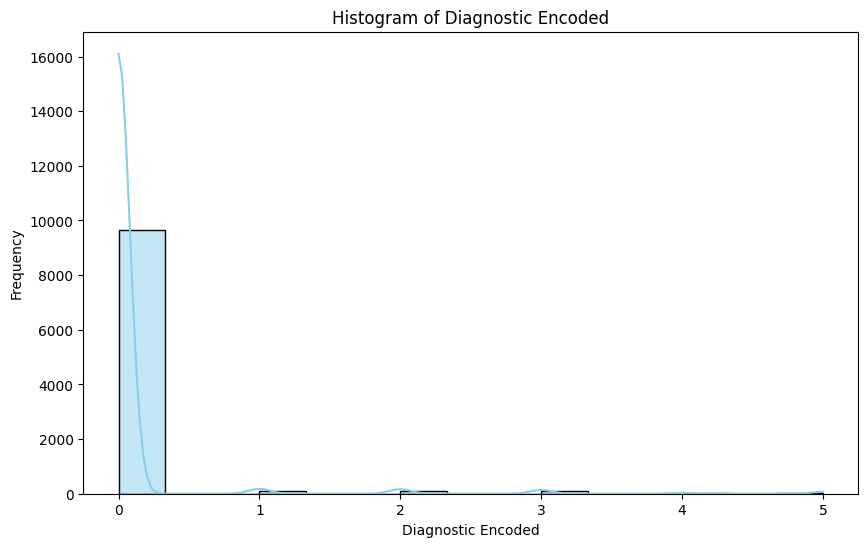

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Diagnostic_encoded'], kde=True,color="skyblue")
plt.title('Histogram of Diagnostic Encoded')
plt.xlabel('Diagnostic Encoded')
plt.ylabel('Frequency')
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Assuming `df` is your original dataset
X = df.drop(columns=['Diagnostic_encoded'])  # Features
y = df['Diagnostic_encoded']                 # Target Variable

# Define new sampling strategy based on encoded values
sampling_strategy = {
    1.0: 3200,
    2.0: 3000,
    3.0: 2700,
    5.0: 2500,
    4.0: 2000
}

# Apply SMOTE with custom distribution
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Diagnostic_encoded'] = y_resampled

# Check new class distribution
print(df['Diagnostic_encoded'].value_counts(normalize=True) * 100)

Diagnostic_encoded
0.0    41.870554
1.0    13.881659
2.0    13.014055
3.0    11.712650
5.0    10.845046
4.0     8.676037
Name: proportion, dtype: float64


<ipython-input-24-a9c36bf11116>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


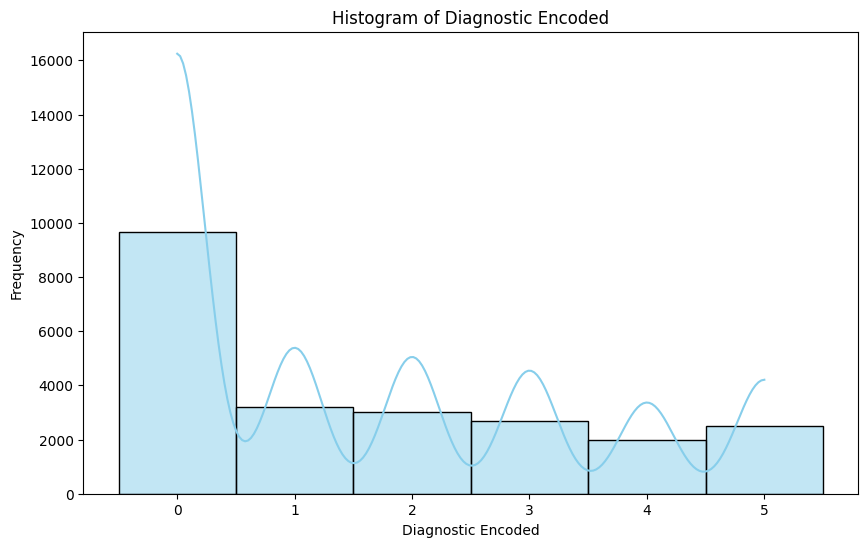

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Get the unique values of 'Diagnostic_encoded' and their counts
unique_values, counts = np.unique(df['Diagnostic_encoded'], return_counts=True)

# Define the desired colors for each bar
colors = ['purple', 'pink', 'blue', 'red', 'green']

# Create the histogram with custom colors
sns.histplot(
    df['Diagnostic_encoded'],
    kde=True,
    bins=np.arange(len(unique_values) + 1) - 0.5,  # Center bars on integer values
    color="skyblue",  # This sets a default color for potential extra bars
    palette=colors  # Use the custom color palette
)

plt.title('Histogram of Diagnostic Encoded')
plt.xlabel('Diagnostic Encoded')
plt.ylabel('Frequency')
plt.xticks(unique_values)  # Ensure x-axis ticks align with bar centers
plt.show()

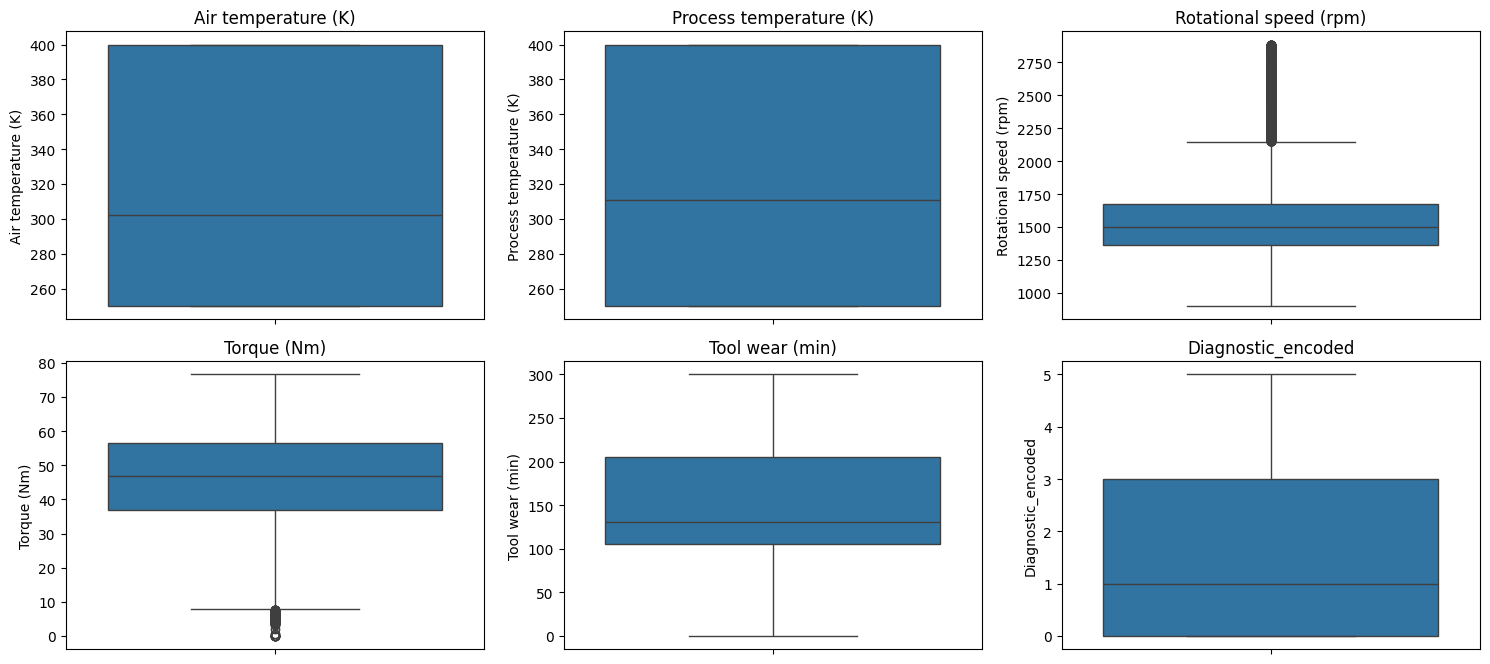

In [25]:
# Create box plots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

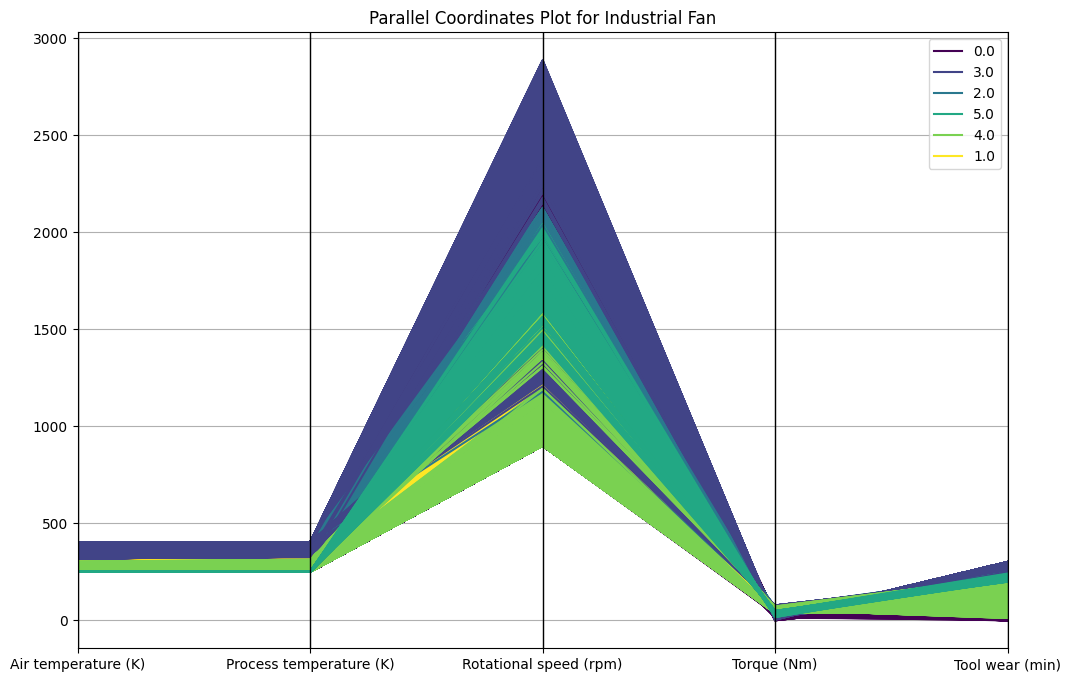

In [27]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 8))
parallel_coordinates(df, 'Diagnostic_encoded', colormap='viridis')
plt.title('Parallel Coordinates Plot for Industrial Fan')
plt.show()

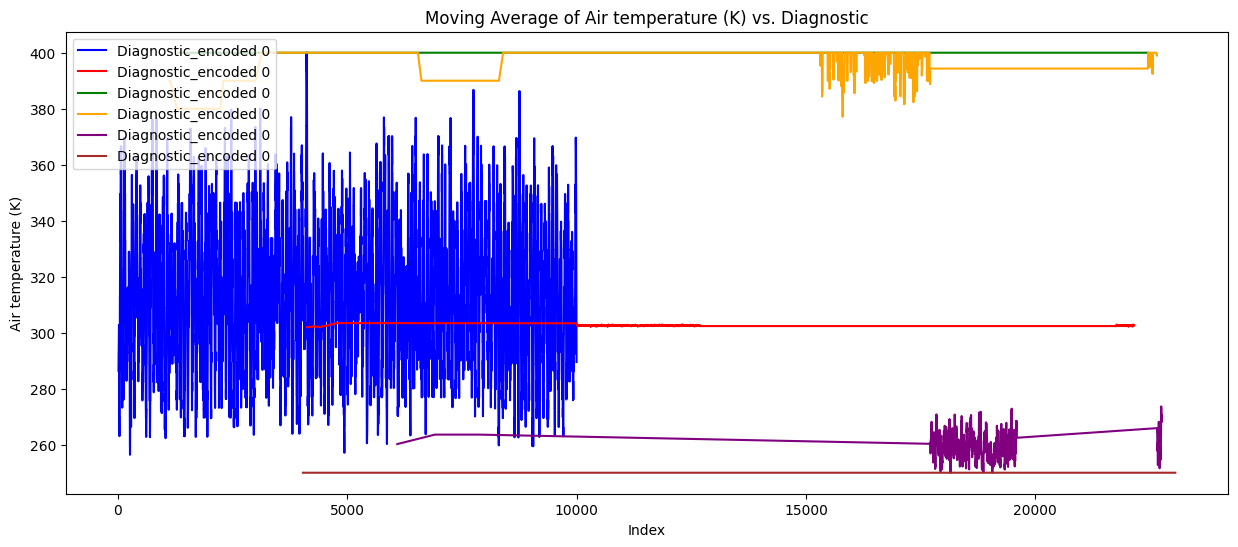

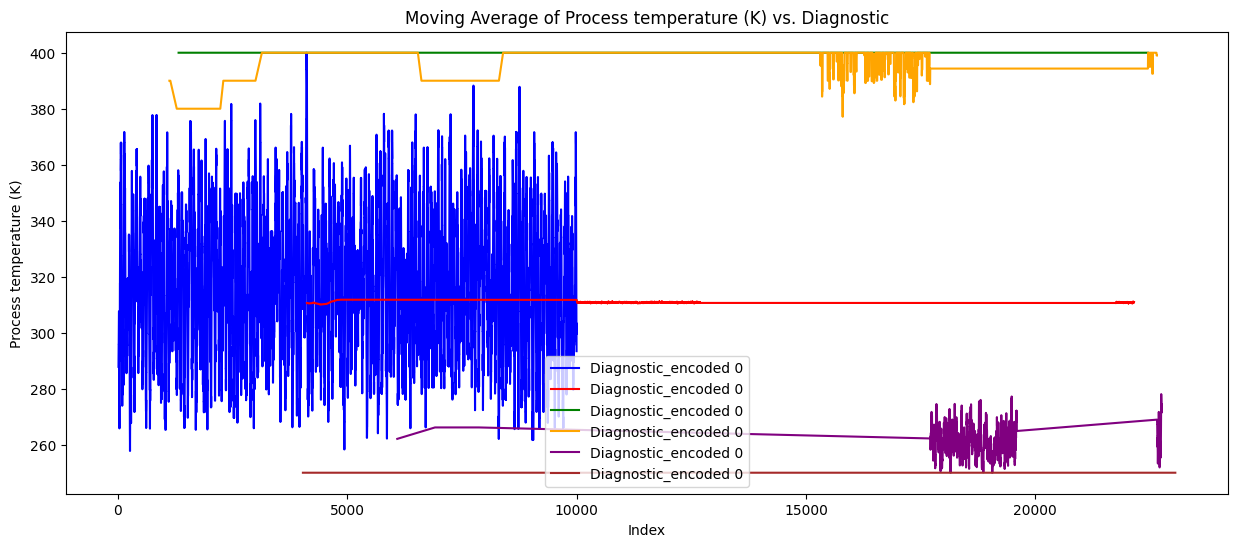

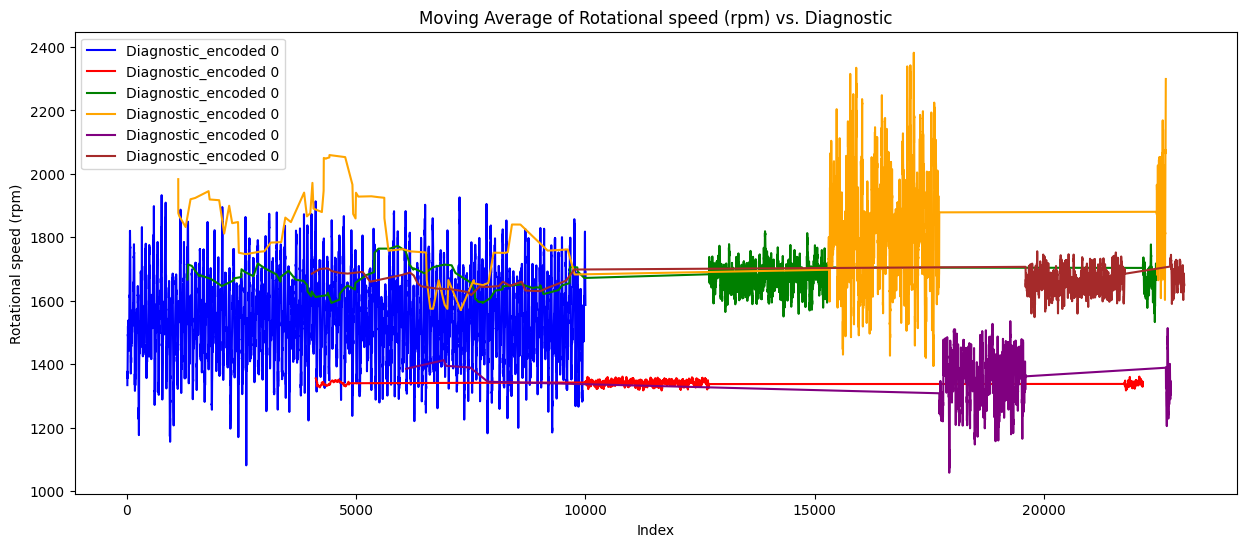

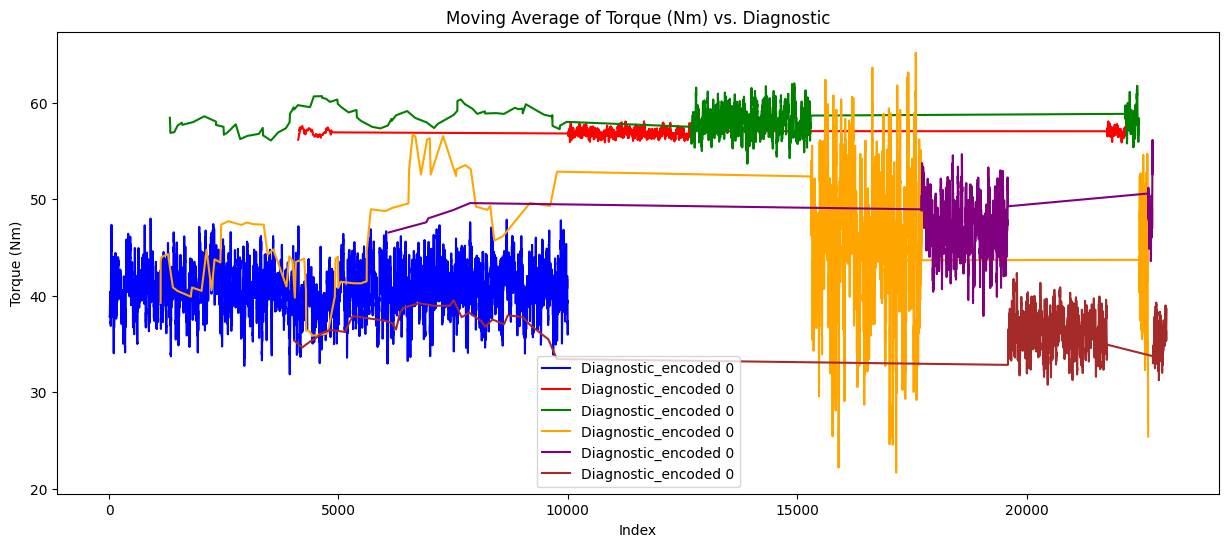

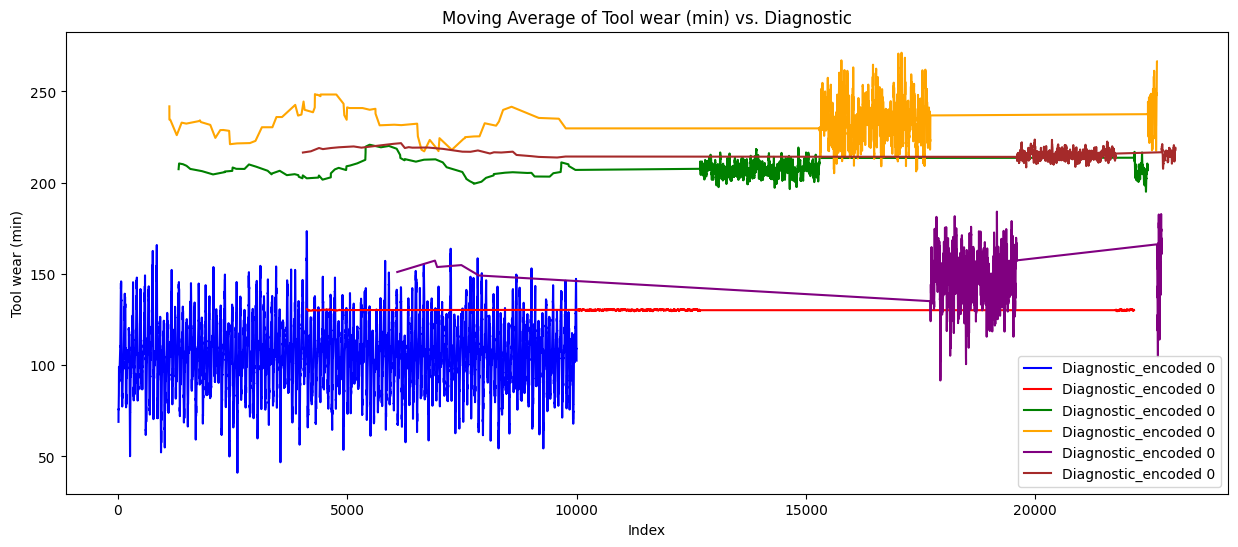

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

for sensor in df.columns:
    if sensor != 'Diagnostic_encoded' and pd.api.types.is_numeric_dtype(df[sensor]):
        plt.figure(figsize=(15, 6))

        # Define colors for each target
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

        # Loop through targets 0 to 5
        for Diagnostic_encoded in range(6):
            df_target = df[df['Diagnostic_encoded'] == Diagnostic_encoded]
            rolling_mean = df_target[sensor].rolling(window=15).mean()
            plt.plot(rolling_mean, label=f'Diagnostic_encoded {target}', color=colors[Diagnostic_encoded])

        plt.title(f'Moving Average of {sensor} vs. Diagnostic')
        plt.xlabel('Index')
        plt.ylabel(sensor)
        plt.legend()
        plt.show()

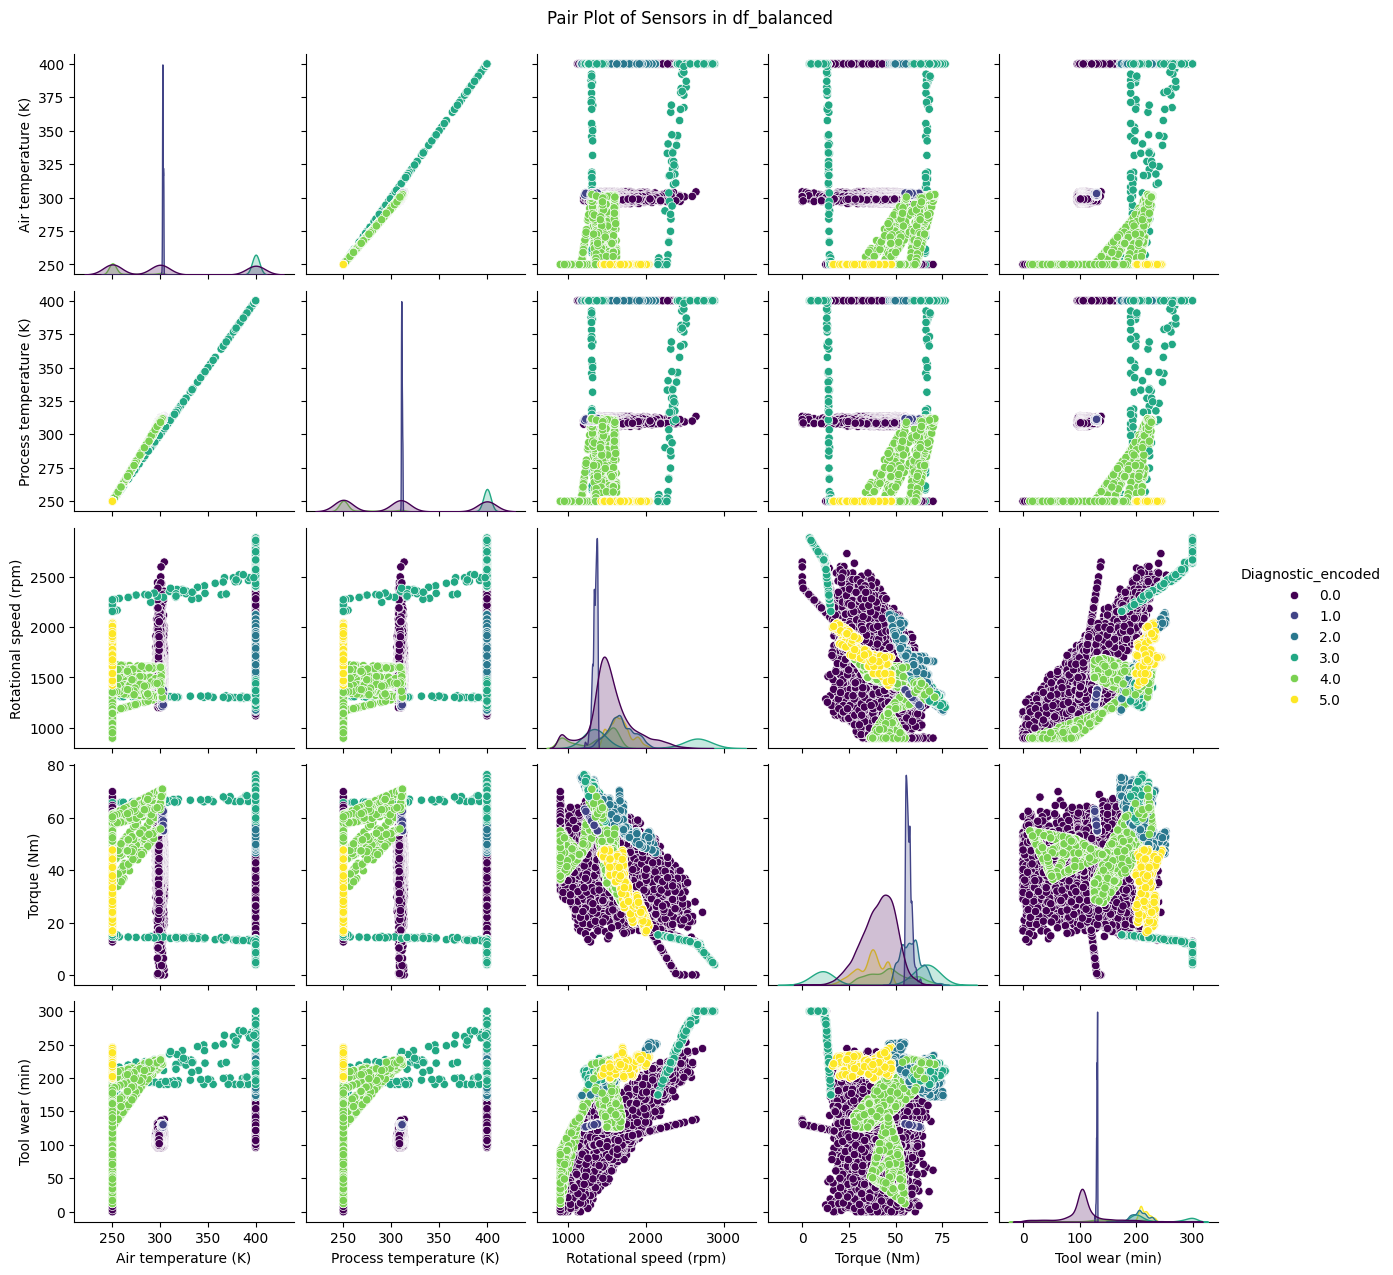

In [33]:
import matplotlib.pyplot as plt
# Create a pair plot for the sensors in df_balanced
sns.pairplot(df, hue='Diagnostic_encoded', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Sensors in df_balanced', y=1.02)
plt.show()